# Computing the $W_{\Delta 3}$ amplitude

This is the updated notebook I did the proper calculation and found a few (irrelevant) but present factors in the formulas

In [1]:
using SL2Cfoam
using HalfIntegers
using LinearAlgebra
using JSON
using WignerSymbols
using NPZ

In [2]:
# load the boundary data from the file
include("boundary_data.jl");

In [3]:
# Barbero-Immirzi parameter
Immirzi = 1.0

# initializing sl2cfoam-next   
sl2c_data_folder = "/home/akogios/Projects/sl2cfoam-next/data_sl2cfoam"
sl2c_config = SL2Cfoam.Config(VerbosityOff, VeryHighAccuracy, 100, 0)
SL2Cfoam.cinit(sl2c_data_folder,Immirzi, sl2c_config)

In [4]:
j = 10;

In [5]:
using Combinatorics

function generate_combinations_string(nums::Vector{Int})
    # Check input length
    if length(nums) != 5
        throw(ArgumentError("Input must be a vector of exactly five numbers"))
    end
    
    # Generate all 3-element combinations
    combs = combinations(nums, 3)
    
    # For each combination, sort and create a string starting with 'j'
    result_strings = []
    for c in combs
        sorted_c = sort(c)
        # Convert to string: e.g., "j 1 2 4"
        combo_str = "j" * join(sorted_c)
        push!(result_strings, combo_str)
    end
    
    return result_strings
end

# Example usage:
nums = [1, 2, 3, 4, 5]
combinations_str_list = generate_combinations_string(nums)

# Print the combinations
for combo_str in combinations_str_list
    println(combo_str)
end

j123
j124
j125
j134
j135
j145
j234
j235
j245
j345


In [6]:
j123 = copy(j);
j124 = copy(j);
j125 = copy(j);
j134 = copy(j);
j135 = copy(j);
j145 = copy(j);
j234 = copy(j);
j235 = copy(j);
j245 = copy(j);
j345 = copy(j);

In [7]:
delta = "00"  # Select desired delta
tetra_data = boundary_data_dict[delta];

## Run

In [8]:
# Extract theta and phi values for each boundary tetrahedron
# First 4-simplex
thetas_1245 = [theta for (theta, phi) in tetra_data["tetra1245"]];
phis_1245 = [phi for (theta, phi) in tetra_data["tetra1245"]];
thetas_1345 = [theta for (theta, phi) in tetra_data["tetra1345"]];
phis_1345 = [phi for (theta, phi) in tetra_data["tetra1345"]];
thetas_2345 = [theta for (theta, phi) in tetra_data["tetra2345"]];
phis_2345 = [phi for (theta, phi) in tetra_data["tetra2345"]];

In [9]:
cs1245 = Array{ComplexF64}(undef,2*j+1)
cs1345 = Array{ComplexF64}(undef,2*j+1)
cs2345 = Array{ComplexF64}(undef,2*j+1)
cs1245[:] .= 0;
cs1345[:] .= 0;
cs2345[:] .= 0;
cs1245 = copy(coherentstate_compute([j125 j124 j245 j145], [thetas_1245 phis_1245]).a);
cs1345 = copy(coherentstate_compute([j145 j135 j134 j345], [thetas_1345 phis_1345]).a);
cs2345 = copy(coherentstate_compute([j345 j245 j235 j234], [thetas_2345 phis_2345]).a);

Setup and calculation of the partial amplitude

In [10]:
partial_amplitude = Array{ComplexF64}(undef,3*j+1)
partial_amplitude[:] .= 0;

How to write a matrix $I$ that has as elements 
$$I_{ik} = (-1)^{j_{123}} \left\lbrace\begin{array}{ccc}
j_{123} & j & i\\
j & j & k
\end{array}\right\rbrace$$
check that it is symmetric.


In [11]:
wigner6j(2, 3, 1, 1 ,1, 2)

+√(1//45)

In [12]:
Av = copy(vertex_BF_compute([j,j,j,j,j,j,j,j,j,j]).a)

21×21×21×21×21 Array{Float64, 5}:
[:, :, 1, 1, 1] =
  5.14189e-6  -8.90602e-6   1.14976e-5  …  -3.21111e-5   3.29242e-5
 -8.90602e-6   1.52854e-5  -1.93713e-5     -4.04495e-5   5.18421e-5
  1.14976e-5  -1.93713e-5   2.36252e-5     -2.15692e-5   5.52882e-5
 -1.36042e-5   2.22778e-5  -2.5556e-5       9.57036e-6   4.90635e-5
  1.54257e-5  -2.42891e-5   2.54732e-5      3.6896e-5    3.78303e-5
 -1.70537e-5   2.551e-5    -2.35328e-5  …   5.02032e-5   2.57372e-5
  1.85393e-5  -2.59808e-5   1.98859e-5      4.85126e-5   1.5544e-5
 -1.99145e-5   2.57129e-5  -1.47273e-5      3.74547e-5   8.34849e-6
  2.12006e-5  -2.47028e-5   8.31748e-6      2.40915e-5   3.98412e-6
 -2.2413e-5    2.29393e-5  -9.95666e-7      1.31454e-5   1.68478e-6
  2.35631e-5  -2.04062e-5  -6.81215e-6  …   6.12983e-6   6.28504e-7
 -2.46596e-5   1.70847e-5   1.45864e-5      2.44575e-6   2.05548e-7
  2.57095e-5  -1.29542e-5  -2.17084e-5      8.32224e-7   5.8445e-8
 -2.6718e-5    7.9933e-6    2.74556e-5      2.39739e-7   1.42912e-

In [18]:
contracted_vertex = contract(Av,cs1245);

In [20]:
# 2. Define the output file name
file_name = "julia_array.npy"

# 3. Save the Julia array to an .npy file
# NPZ.npzwrite will automatically handle the .npy extension
NPZ.npzwrite(file_name, contracted_vertex)

copy(vertex_BF_compute([j12,j13,j14,j15,j23,j24,j25,j34,j35,j45]).a)

In [12]:
for j_bulk = 0:3*j
    Av = copy(vertex_BF_compute([j_bulk,j,j,j,j,j,j,j,j,j]).a);
    ((imin,imax),dimi)=intertwiner_range(j,j,j_bulk,j);
    intertwiner_phase = [(-1)^(j_bulk+i+k) * wigner6j(j_bulk, j, i, j, j, k)*sqrt(dim(i)*dim(k)) for i in imin:imax, k in imin:imax]; # Here we have the matrix I;
    contracted_vertex = contract(Av,cs1245,cs1345,cs2345)*intertwiner_phase;
    partial_amplitude[j_bulk+1] = dim(j_bulk) * tr(contracted_vertex^3);
end

In [13]:
tot = sum(partial_amplitude)

9.506578914520214e-24 - 3.6112083991282244e-27im

In [14]:
rescaled_partial_amplitude = partial_amplitude./tot;

check

In [15]:
sum(rescaled_partial_amplitude)

1.0000000000000004 + 1.0163333169705363e-19im

Saving the data

In [16]:
using CSV, DataFrames

# Define your directory path and file name
dir_path = "data/j$j/"  
file_name = "D3_partial_amplitude_d$delta.csv" 

# Check if the directory exists
if !isdir(dir_path)
    mkpath(dir_path)  # Create the directory if it does not exist
end

amplitude_df = DataFrame([0:3j, real(rescaled_partial_amplitude), imag(rescaled_partial_amplitude)], :auto)
CSV.write(joinpath(dir_path, file_name), amplitude_df, header = false)                                                       
     


"data/j25/D3_partial_amplitude_d00.csv"

In [17]:
#Debug 
average = 0.0 + 0.0im
for j_bulk = 0:3*j
    average += j_bulk * rescaled_partial_amplitude[j_bulk+1]
end
average/j

1.3283905053159004 + 9.69311105269147e-7im

In [18]:
using Plots
using Plots.PlotMeasures

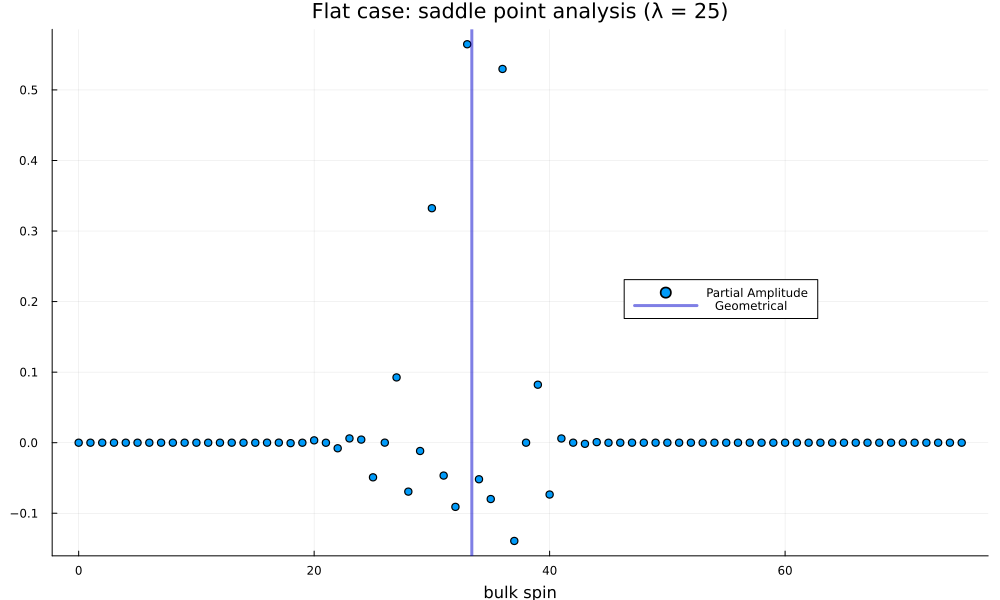

In [19]:
scatter(0:3*j, real(rescaled_partial_amplitude), shape=:circle, label = "Partial Amplitude", 
    title="Flat case: saddle point analysis (λ = $j)", legend=(.7,.5), size=(1000,600))
vline!([1.3356732320527571 *j], label = "  Geometrical", linewidth=3, color=:mediumblue, opacity=.5)
xaxis!("bulk spin")
#savefig("partial_amplitude_3.png")

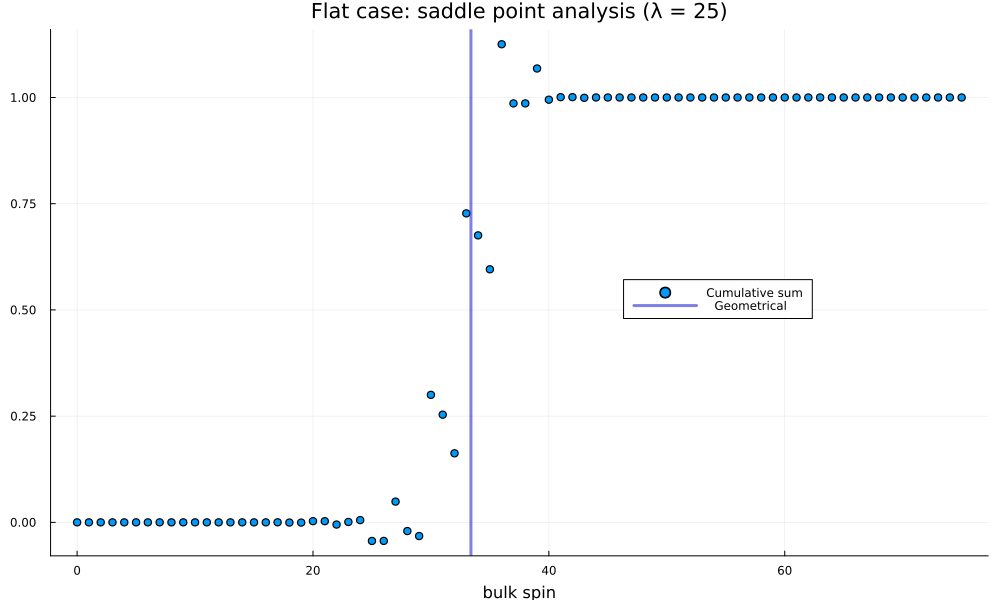

In [20]:
scatter(0:3*j, cumsum(real(rescaled_partial_amplitude)), shape=:circle, label = "Cumulative sum", 
    title="Flat case: saddle point analysis (λ = $j)", legend=(.7,.5), size=(1000,600))
vline!([1.3356732320527571 *j], label = "  Geometrical", linewidth=3, color=:mediumblue, opacity=.5)
xaxis!("bulk spin")
#savefig("cumulative_sum_3.png")